
# Exercici 1

Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

df = pd.read_csv ('wineData.txt', names= ['Alcohol','Ácido málico', 'Cenizas', 'Alcalinidad de la ceniza','Magnesio','Fenoles totales','Flavanoides','Fenoles no flavonoides','Proantocianinas','Intensidad del color','Tonalidad','DO280/OD315 de los vinos diluidos','Prolina'])

Importo csv i li posi el títol de les columnes

In [2]:
df.reset_index(inplace=True, names='Clases')
df.head()


,Clases,Alcohol,Ácido málico,Cenizas,Alcalinidad de la ceniza,Magnesio,Fenoles totales,Flavanoides,Fenoles no flavonoides,Proantocianinas,Intensidad del color,Tonalidad,DO280/OD315 de los vinos diluidos,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Passo l'índex com a columna ja que és on hi ha informació de les diferents classes de vi

In [3]:
X=df.drop("Clases", axis=1)
y=df.Clases


Separo X i y

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test


Dividexio train i test

MODEL DecisionTreeClassifier

In [5]:
dtc = DecisionTreeClassifier()

dtc = dtc.fit(X_train,y_train)

y_pred_dtc = dtc.predict(X_test)

Entreno el model amb DecisionTreeClassifier

In [6]:
from sklearn.metrics import confusion_matrix
y_true=y_test
confusion_matrix_dtc=confusion_matrix(y_true, y_pred_dtc)

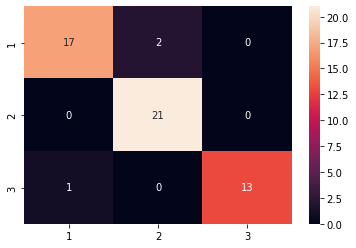

In [7]:
import seaborn as sns
confusion_matrix_dtc = pd.DataFrame(confusion_matrix_dtc,
    columns=["1", "2", "3"],
    index=["1", "2", "3"]
)

sns.heatmap(confusion_matrix_dtc, annot=True)

Faig un confussion matrix i dona dos errors, un en classificar l'1 com a 2 i en classificar 3 com a 1

In [8]:
print(dtc.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Faig un print dels paràmetres que s'han utilitzat per entrenar el model

MODEL K-nearest Neighbors (KNN)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

classifier=classifier.fit(X_train, y_train)

y_pred_knn = classifier.predict(X_test)

In [10]:
print(classifier.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [11]:
from sklearn.metrics import confusion_matrix

Dubte: Si no torno a imporar confusion_matrix em dóna error, perquè?

In [12]:
confusion_matrix_knn=confusion_matrix(y_true, y_pred_knn)

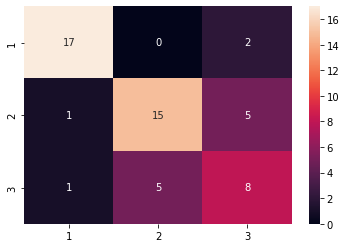

In [13]:
import seaborn as sns
confusion_matrix_knn = pd.DataFrame(confusion_matrix_knn,
    columns=["1", "2", "3"],
    index=["1", "2", "3"]
)

sns.heatmap(confusion_matrix_knn, annot=True)

En aquest cas dóna molts més errors, tenint fins a 14 errors envers els 2 de l'anterior model


# Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

In [14]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Calcular la precisió per a cada model
acc_dtc = accuracy_score(y_test, y_pred_dtc)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ('acc_dtc:', acc_dtc)
print ('acc_knn:',acc_knn)

acc_dtc: 0.9444444444444444
acc_knn: 0.7407407407407407


In [15]:
# Calcular la sensibilitat per a cada model (micro)
rec_dtc_micro = recall_score(y_test, y_pred_dtc, average='micro')
rec_knn_micro = recall_score(y_test, y_pred_knn, average='micro')
print ('rec_dtc_micro:', rec_dtc_micro)
print ('rec_knn_micro:',rec_knn_micro)

rec_dtc_micro: 0.9444444444444444
rec_knn_micro: 0.7407407407407407


In [16]:
# Calcular la sensibilitat per a cada model (macro)
rec_dtc_macro = recall_score(y_test, y_pred_dtc, average='macro')
rec_knn_macro = recall_score(y_test, y_pred_knn, average='macro')
print ('rec_dtc_macro:', rec_dtc_macro)
print ('rec_knn_macro:', rec_knn_macro)

rec_dtc_macro: 0.9411027568922306
rec_knn_macro: 0.7268170426065163


In [17]:
#Calcular l'indicador F1 per a cada model (micro)
f1_dtc_micro = f1_score(y_test, y_pred_dtc,average='micro')
f1_knn_micro = f1_score(y_test, y_pred_knn, average='micro')
print ('f1_dtc_micro:', f1_dtc_micro)
print ('f1_knn_micro:',f1_knn_micro)

f1_dtc_micro: 0.9444444444444444
f1_knn_micro: 0.7407407407407407


Dubte: perquè em dóna el mateix resultat accuracy, recall score micro i f1 micro ?

In [18]:
#Calcular l'indicador F1 per a cada model (macro)
f1_dtc_macro = f1_score(y_test, y_pred_dtc,average='macro')
f1_knn_macro = f1_score(y_test, y_pred_knn, average='macro')
print ('f1_dtc_macro:', f1_dtc_macro)
print ('f1_knn_macro:', f1_knn_macro)

f1_dtc_macro: 0.945475778809112
f1_knn_macro: 0.7260560990364894


In [19]:
df_compar= pd.DataFrame()
df_compar ['Mètodes']= 'Accuracy','Sensibilitat (Macro)','F1(Macro)'
df_compar['DecisionTreeClassifier']= acc_dtc, rec_dtc_macro, f1_dtc_macro
df_compar['KNN']= acc_knn, rec_knn_macro, f1_knn_macro
df_compar

,Mètodes,DecisionTreeClassifier,KNN
0,Accuracy,0.944444,0.740741
1,Sensibilitat (Macro),0.941103,0.726817
2,F1(Macro),0.945476,0.726056


In [20]:
acc_dtc_st=acc_dtc
rec_dtc_macro_st=rec_dtc_macro
f1_dtc_macro_st=f1_dtc_macro
acc_knn_st=acc_knn
rec_knn_macro_st=rec_knn_macro
f1_knn_macro_st=f1_knn_macro

Es veu clarament com DecissionTreeClassifier té uns molt millors resultats en totes les mètriques que KNN

# Exercici 3

Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [5,6,7,8,9,10,11,12,15],
              'min_samples_split': [3,4,5,6,7,8,10,13,14,15,16,17,18],
              'criterion': ['gini', 'entropy'],
             'min_samples_leaf':[3,4,5,6,7,],
             'max_features':[1,3,4,5,6,7,9,11,13],
             'random_state':[42]}
dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(dtc, parameters, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_
best_params

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'random_state': 42}

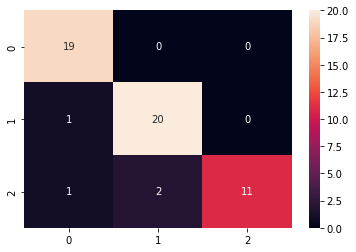

In [22]:
dtc = DecisionTreeClassifier(criterion='gini',
                                max_depth= 5, 
                                max_features=3,
                                  min_samples_leaf=4,
                                min_samples_split=3,
                               random_state=42)

dtc= dtc.fit(X_train,y_train)

y_pred_dtc = dtc.predict(X_test)
y_true=y_test
confusion_matrix_dtc=confusion_matrix(y_true, y_pred_dtc)
confusion_matrix_dtc_gs = pd.DataFrame(confusion_matrix_dtc,
    columns=["1", "2", "3"],
    index=["1", "2", "3"]
)

sns.heatmap(confusion_matrix_dtc, annot=True)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7], 
              'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 3, 5], 
              'max_features': [None, 'sqrt', 'log2'],
             'random_state':[42]}
dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(dtc, parameters, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_
best_params

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 42}

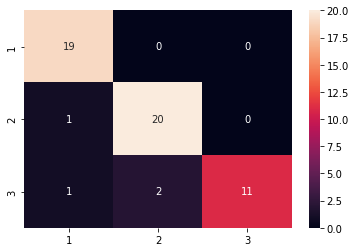

In [24]:
dtc = DecisionTreeClassifier(criterion='entropy',
                                max_depth= 3, 
                                  min_samples_leaf=3,
                                min_samples_split=2,
                              random_state=42)

dtc = dtc.fit(X_train,y_train)

y_pred_dtc = dtc.predict(X_test)
y_true=y_test
confusion_matrix_dtc=confusion_matrix(y_true, y_pred_dtc)
confusion_matrix_dtc = pd.DataFrame(confusion_matrix_dtc,
    columns=["1", "2", "3"],
    index=["1", "2", "3"]
)

sns.heatmap(confusion_matrix_dtc_gs, annot=True)

Faig un GrdiSearchCV amb diferents paràtres i em dóna els anteriors paràmetres com els més adequats, he anat afegint valors propers als que m'anava donant per tal de millorar el resultat (sense massa èxit ja que ha empitjorat)

MODEL KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 
              'algorithm': ['ball_tree', 'kd_tree'], 'leaf_size': [20, 30]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_
best_params

{'algorithm': 'ball_tree',
 'leaf_size': 20,
 'n_neighbors': 3,
 'weights': 'distance'}

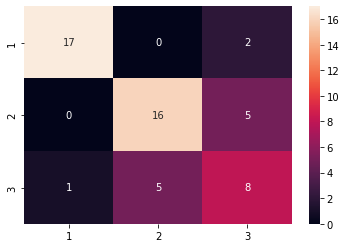

In [26]:
knn = KNeighborsClassifier (algorithm='ball_tree',
                               leaf_size=20,
                                n_neighbors=4,
                                weights= 'distance',
                             
                               )

knn = knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)
y_true=y_test
confusion_matrix_knn=confusion_matrix(y_true, y_pred_knn)
confusion_matrix_knn = pd.DataFrame(confusion_matrix_knn,
    columns=["1", "2", "3"],
    index=["1", "2", "3"]
)

sns.heatmap(confusion_matrix_knn, annot=True)

En aquest cas he pogut fer una petita millora, ja que sense el GridSearch tenia 14 errors i ara en tinc 13. Es manté la classificació en el grup 3 on el marge d'error és més gran


    Exercici 4

Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [27]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Calcular la precisió per a cada model
acc_dtc = accuracy_score(y_test, y_pred_dtc)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ('acc_dtc:', acc_dtc)
print ('acc_knn:',acc_knn)

acc_dtc: 0.8518518518518519
acc_knn: 0.7592592592592593


In [28]:
# Calcular la sensibilitat per a cada model (micro)
rec_dtc_micro = recall_score(y_test, y_pred_dtc, average='micro')
rec_knn_micro = recall_score(y_test, y_pred_knn, average='micro')
print ('rec_dtc_micro:', rec_dtc_micro)
print ('rec_knn_micro:',rec_knn_micro)

rec_dtc_micro: 0.8518518518518519
rec_knn_micro: 0.7592592592592593


In [29]:
# Calcular la sensibilitat per a cada model (macro)
rec_dtc_macro = recall_score(y_test, y_pred_dtc, average='macro')
rec_knn_macro = recall_score(y_test, y_pred_knn, average='macro')
print ('rec_dtc_macro:', rec_dtc_macro)
print ('rec_knn_macro:', rec_knn_macro)

rec_dtc_macro: 0.8458646616541353
rec_knn_macro: 0.7426900584795323


In [30]:
#Calcular l'indicador F1 per a cada model (micro)
f1_dtc_micro = f1_score(y_test, y_pred_dtc,average='micro')
f1_knn_micro = f1_score(y_test, y_pred_knn, average='micro')
print ('f1_dtc_micro:', f1_dtc_micro)
print ('f1_knn_micro:',f1_knn_micro)

f1_dtc_micro: 0.8518518518518519
f1_knn_micro: 0.7592592592592593


Dubte: perquè em dóna el mateix resultat accuracy, recall score micro i f1 micro ?

In [31]:
#Calcular l'indicador F1 per a cada model (macro)
f1_dtc_macro = f1_score(y_test, y_pred_dtc,average='macro')
f1_knn_macro = f1_score(y_test, y_pred_knn, average='macro')
print ('f1_dtc_macro:', f1_dtc_macro)
print ('f1_knn_macro:', f1_knn_macro)

f1_dtc_macro: 0.8510989010989012
f1_knn_macro: 0.7441826062515716


In [32]:
df_compar= pd.DataFrame()
df_compar ['Mètodes']= 'Accuracy','Sensibilitat (Macro)','F1(Macro)'
df_compar['DecisionTreeClassifier']= acc_dtc, rec_dtc_macro, f1_dtc_macro
df_compar['KNN']= acc_knn, rec_knn_macro, f1_knn_macro
df_compar

,Mètodes,DecisionTreeClassifier,KNN
0,Accuracy,0.851852,0.759259
1,Sensibilitat (Macro),0.845865,0.742690
2,F1(Macro),0.851099,0.744183


En aquest cas ha empitjorat en totes les mètriques (com ja haviem vist abans ens les matrius de confusió) i KNN té una petita millora també en totes les mètriques

In [33]:
acc_dtc_gd=acc_dtc
rec_dtc_macro_gd=rec_dtc_macro
f1_dtc_macro_gd=f1_dtc_macro
acc_knn_gd=acc_knn
rec_knn_macro_gd=rec_knn_macro
f1_knn_macro_gd=f1_knn_macro

# Exercici 5

Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
df = pd.read_csv ('wineData.txt', names= ['Alcohol','Ácido málico', 'Cenizas', 'Alcalinidad de la ceniza','Magnesio','Fenoles totales','Flavanoides','Fenoles no flavonoides','Proantocianinas','Intensidad del color','Tonalidad','DO280/OD315 de los vinos diluidos','Prolina'])

In [35]:
df.reset_index(inplace=True, names='Clases')
df.head()

,Clases,Alcohol,Ácido málico,Cenizas,Alcalinidad de la ceniza,Magnesio,Fenoles totales,Flavanoides,Fenoles no flavonoides,Proantocianinas,Intensidad del color,Tonalidad,DO280/OD315 de los vinos diluidos,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
X=df.drop("Clases", axis=1)
y=df.Clases

Separo X i y

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test


Faig un Standarscaler

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

MODEL DecisionTreeClassifier

In [39]:
dtc = DecisionTreeClassifier()

dtc = dtc.fit(X_train,y_train)

y_pred_dtc = dtc.predict(X_test)

Entreno el model amb DecisionTreeClassifier

In [40]:
from sklearn.metrics import confusion_matrix
y_true=y_test
confusion_matrix_dtc=confusion_matrix(y_true, y_pred_dtc)

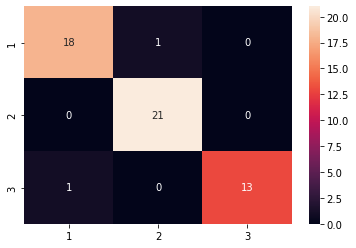

In [41]:
import seaborn as sns
confusion_matrix_dtc = pd.DataFrame(confusion_matrix_dtc,
    columns=["1", "2", "3"],
    index=["1", "2", "3"]
)

sns.heatmap(confusion_matrix_dtc, annot=True)

No hi ha variacions significatives sense la normalització, el nombre d'errors és el mateix però en aquest cas un valor de 3 que classificava com a 1 ara el classifica com a 2

In [42]:
print(dtc.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Faig un print dels paràmetres que s'han utilitzat per entrenar el model

MODEL K-nearest Neighbors (KNN)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

classifier=classifier.fit(X_train, y_train)

y_pred_knn = classifier.predict(X_test)

In [44]:
print(classifier.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [45]:
from sklearn.metrics import confusion_matrix

Dubte: Si no torno a imporar confusion_matrix em dóna error, perquè?

In [46]:
confusion_matrix_knn=confusion_matrix(y_true, y_pred_knn)

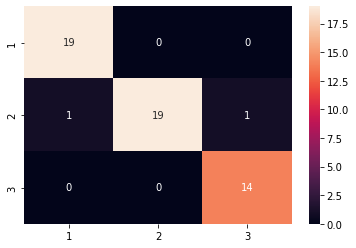

In [47]:
import seaborn as sns
confusion_matrix_knn = pd.DataFrame(confusion_matrix_knn,
    columns=["1", "2", "3"],
    index=["1", "2", "3"]
)

sns.heatmap(confusion_matrix_knn, annot=True)

En aquest cas la diferència és molt gran ja que passem de 14 errors a 2, un canvi molt important en la classificació del 3 ja que passem de 6 errors sobre 14 a cap error.

In [48]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Calcular la precisió per a cada model
acc_dtc = accuracy_score(y_test, y_pred_dtc)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ('acc_dtc:', acc_dtc)
print ('acc_knn:',acc_knn)

acc_dtc: 0.9629629629629629
acc_knn: 0.9629629629629629


In [49]:
# Calcular la sensibilitat per a cada model (macro)
rec_dtc_macro = recall_score(y_test, y_pred_dtc, average='macro')
rec_knn_macro = recall_score(y_test, y_pred_knn, average='macro')
print ('rec_dtc_macro:', rec_dtc_macro)
print ('rec_knn_macro:', rec_knn_macro)

rec_dtc_macro: 0.9586466165413533
rec_knn_macro: 0.9682539682539683


In [50]:
#Calcular l'indicador F1 per a cada model (macro)
f1_dtc_macro = f1_score(y_test, y_pred_dtc,average='macro')
f1_knn_macro = f1_score(y_test, y_pred_knn, average='macro')
print ('f1_dtc_macro:', f1_dtc_macro)
print ('f1_knn_macro:', f1_knn_macro)

f1_dtc_macro: 0.9623585233540354
f1_knn_macro: 0.9632920719127616


In [51]:
df_compar= pd.DataFrame()
df_compar ['Mètodes']= 'Accuracy','Sensibilitat (Macro)','F1(Macro)'
df_compar['DecisionTreeClassifier']= acc_dtc, rec_dtc_macro, f1_dtc_macro
df_compar['KNN']= acc_knn, rec_knn_macro, f1_knn_macro
df_compar

,Mètodes,DecisionTreeClassifier,KNN
0,Accuracy,0.962963,0.962963
1,Sensibilitat (Macro),0.958647,0.968254
2,F1(Macro),0.962359,0.963292


En aquest cas DecisionTreeClassifier té una petita millora, però KNN ha millorat moltíssim, superant o DecisionTreeClassifier en totes les mètriques

In [52]:
acc_dtc_sds=acc_dtc
rec_dtc_macro_sds=rec_dtc_macro
f1_dtc_macro_sds=f1_dtc_macro
acc_knn_sds=acc_knn
rec_knn_macro_sds=rec_knn_macro
f1_knn_macro_sds=f1_knn_macro

# GridSearch

Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

DecisionTreeClassifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [5,6,7,8,9,10,11,12,15],
              'min_samples_split': [3,4,5,6,7,8,10,13,14,15,16,17,18],
              'criterion': ['gini', 'entropy'],
             'min_samples_leaf':[3,4,5,6,7,],
             'max_features':[1,3,4,5,6,7,9,11,13],
             'random_state':[42]}
dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(dtc, parameters, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_
best_params

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'random_state': 42}

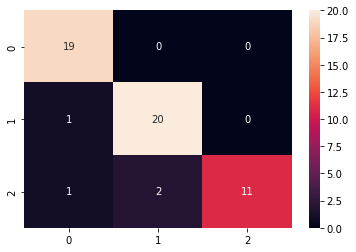

In [54]:
dtc = DecisionTreeClassifier(criterion='gini',
                                max_depth= 5, 
                                max_features=3,
                                  min_samples_leaf=4,
                                min_samples_split=3,
                               random_state=42)

dtc= dtc.fit(X_train,y_train)

y_pred_dtc = dtc.predict(X_test)
y_true=y_test
confusion_matrix_dtc=confusion_matrix(y_true, y_pred_dtc)
confusion_matrix_dtc_gs = pd.DataFrame(confusion_matrix_dtc,
    columns=["1", "2", "3"],
    index=["1", "2", "3"]
)

sns.heatmap(confusion_matrix_dtc, annot=True)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7], 
              'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 3, 5], 
              'max_features': [None, 'sqrt', 'log2'],
             'random_state':[42]}
dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(dtc, parameters, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_
best_params

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 42}

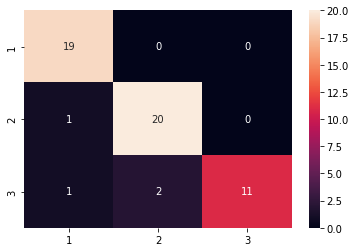

In [56]:
dtc = DecisionTreeClassifier(criterion='entropy',
                                max_depth= 3, 
                                  min_samples_leaf=3,
                                min_samples_split=2,
                              random_state=42)

dtc = dtc.fit(X_train,y_train)

y_pred_dtc = dtc.predict(X_test)
y_true=y_test
confusion_matrix_dtc=confusion_matrix(y_true, y_pred_dtc)
confusion_matrix_dtc = pd.DataFrame(confusion_matrix_dtc,
    columns=["1", "2", "3"],
    index=["1", "2", "3"]
)

sns.heatmap(confusion_matrix_dtc_gs, annot=True)

Els resultats han empitjorat envers els realitzats sense GridSearch

MODEL KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 
              'algorithm': ['ball_tree', 'kd_tree'], 'leaf_size': [20, 30]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_
best_params

{'algorithm': 'ball_tree',
 'leaf_size': 20,
 'n_neighbors': 3,
 'weights': 'distance'}

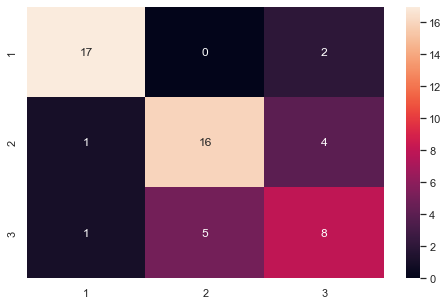

In [104]:
knn = KNeighborsClassifier (algorithm='ball_tree',
                               leaf_size=20,
                                n_neighbors=5,
                                weights= 'distance',
                             
                               )

knn = knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)
y_true=y_test
confusion_matrix_knn=confusion_matrix(y_true, y_pred_knn)
confusion_matrix_knn = pd.DataFrame(confusion_matrix_knn,
    columns=["1", "2", "3"],
    index=["1", "2", "3"]
)

sns.heatmap(confusion_matrix_knn, annot=True)

Es mantenen els resultats aconseguits sense el GridSearch

In [59]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Calcular la precisió per a cada model
acc_dtc = accuracy_score(y_test, y_pred_dtc)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ('acc_dtc:', acc_dtc)
print ('acc_knn:',acc_knn)

acc_dtc: 0.8518518518518519
acc_knn: 0.9629629629629629


In [60]:
# Calcular la sensibilitat per a cada model (macro)
rec_dtc_macro = recall_score(y_test, y_pred_dtc, average='macro')
rec_knn_macro = recall_score(y_test, y_pred_knn, average='macro')
print ('rec_dtc_macro:', rec_dtc_macro)
print ('rec_knn_macro:', rec_knn_macro)

rec_dtc_macro: 0.8458646616541353
rec_knn_macro: 0.9682539682539683


In [61]:
#Calcular l'indicador F1 per a cada model (macro)
f1_dtc_macro = f1_score(y_test, y_pred_dtc,average='macro')
f1_knn_macro = f1_score(y_test, y_pred_knn, average='macro')
print ('f1_dtc_macro:', f1_dtc_macro)
print ('f1_knn_macro:', f1_knn_macro)

f1_dtc_macro: 0.8510989010989012
f1_knn_macro: 0.9632920719127616


In [62]:
df_compar= pd.DataFrame()
df_compar ['Mètodes']= 'Accuracy','Sensibilitat (Macro)','F1(Macro)'
df_compar['DecisionTreeClassifier']= acc_dtc, rec_dtc_macro, f1_dtc_macro
df_compar['KNN']= acc_knn, rec_knn_macro, f1_knn_macro
df_compar

,Mètodes,DecisionTreeClassifier,KNN
0,Accuracy,0.851852,0.962963
1,Sensibilitat (Macro),0.845865,0.968254
2,F1(Macro),0.851099,0.963292


Després del GridSearchCV DecisionTreeClassifier empitjora força i KNN es manté en les mateixes mètriques

In [63]:
acc_dtc_sds_gs=acc_dtc
rec_dtc_macro_sds_gs=rec_dtc_macro
f1_dtc_macro_sds_gs=f1_dtc_macro
acc_knn_sds_gs=acc_knn
rec_knn_macro_sds_gs=rec_knn_macro
f1_knn_macro_sds_gs=f1_knn_macro

# Exercici 5

Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

In [64]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
df = pd.read_csv ('wineData.txt', names= ['Alcohol','Ácido málico', 'Cenizas', 'Alcalinidad de la ceniza','Magnesio','Fenoles totales','Flavanoides','Fenoles no flavonoides','Proantocianinas','Intensidad del color','Tonalidad','DO280/OD315 de los vinos diluidos','Prolina'])

In [65]:
df.reset_index(inplace=True, names='Clases')
df.head()

,Clases,Alcohol,Ácido málico,Cenizas,Alcalinidad de la ceniza,Magnesio,Fenoles totales,Flavanoides,Fenoles no flavonoides,Proantocianinas,Intensidad del color,Tonalidad,DO280/OD315 de los vinos diluidos,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [66]:
X=df.drop("Clases", axis=1)
y=df.Clases

Separo X i y

<Figure size 432x288 with 0 Axes>

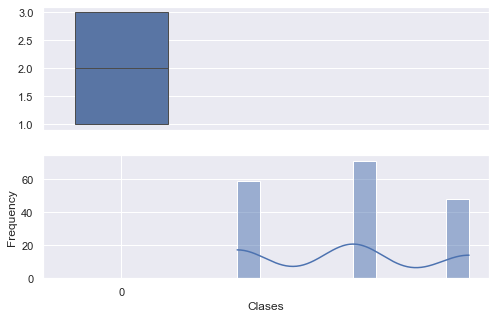

<Figure size 576x360 with 0 Axes>

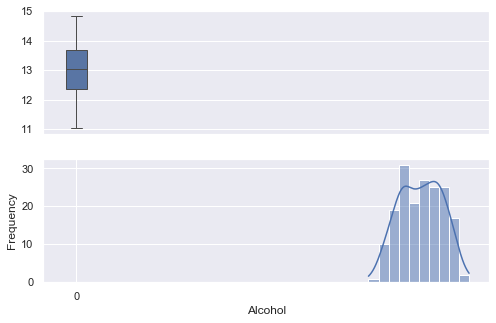

<Figure size 576x360 with 0 Axes>

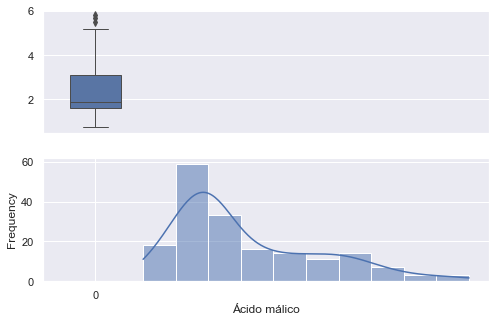

<Figure size 576x360 with 0 Axes>

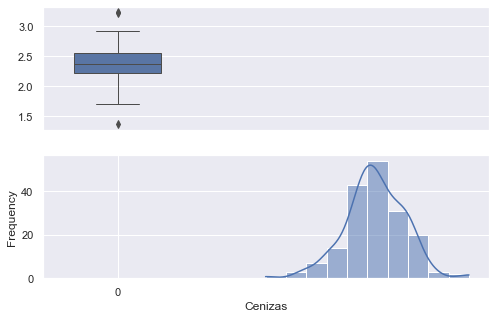

<Figure size 576x360 with 0 Axes>

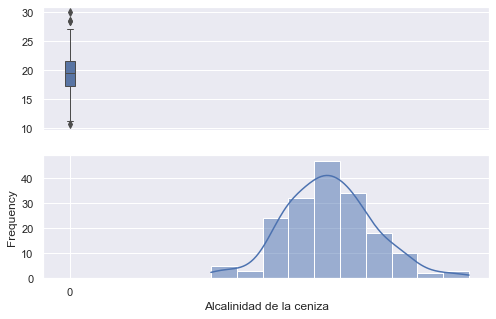

<Figure size 576x360 with 0 Axes>

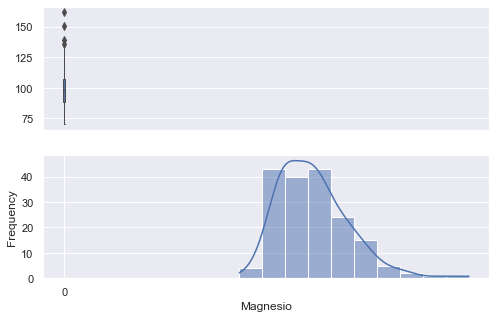

<Figure size 576x360 with 0 Axes>

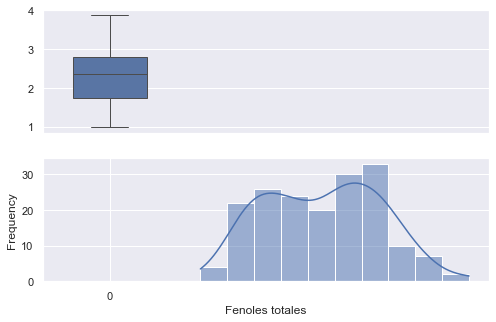

<Figure size 576x360 with 0 Axes>

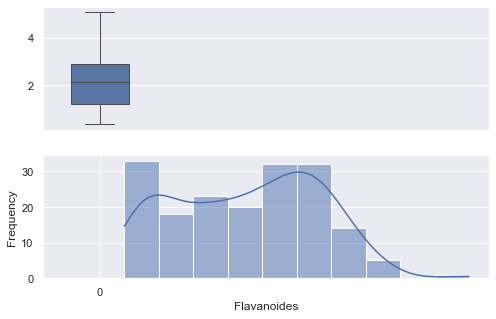

<Figure size 576x360 with 0 Axes>

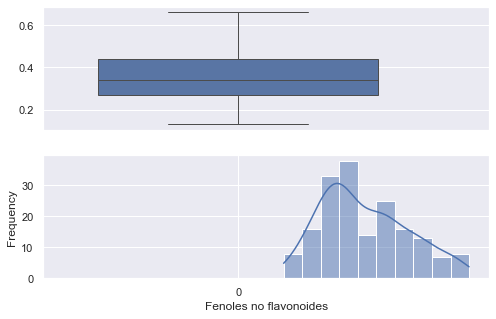

<Figure size 576x360 with 0 Axes>

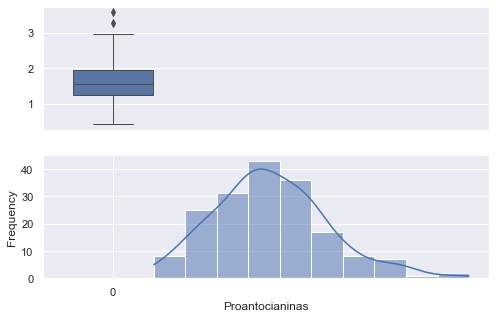

<Figure size 576x360 with 0 Axes>

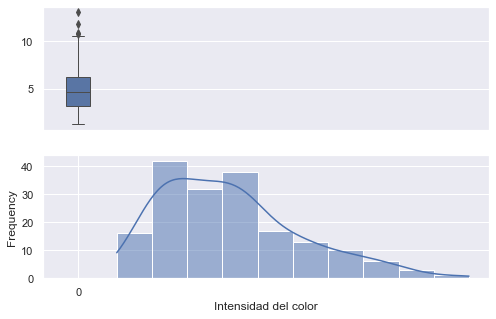

<Figure size 576x360 with 0 Axes>

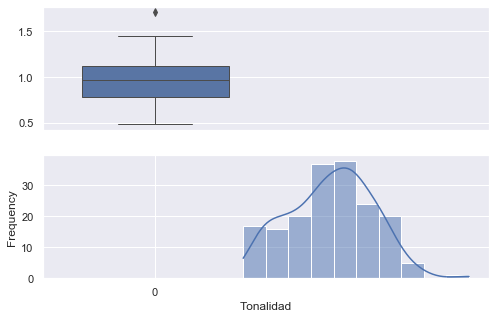

<Figure size 576x360 with 0 Axes>

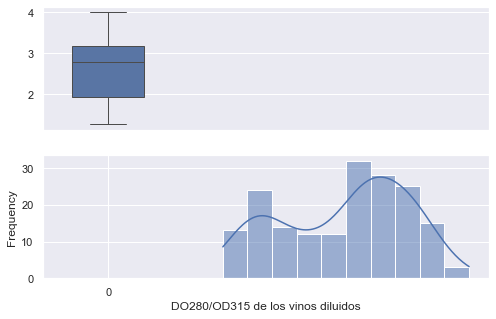

<Figure size 576x360 with 0 Axes>

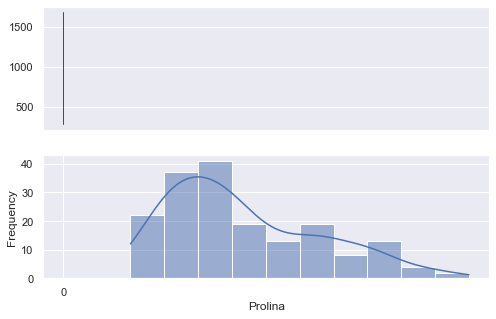

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

In [68]:
from sklearn import preprocessing 

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

columnsNorm = ['Clases','Alcohol','Fenoles totales','Flavanoides','Fenoles no flavonoides','DO280/OD315 de los vinos diluidos','Prolina']
scaler = preprocessing.MinMaxScaler().fit(df[columnsNorm])
df[columnsNorm] = scaler.transform(df[columnsNorm])

columnsRobust = ['Ácido málico','Cenizas','Alcalinidad de la ceniza','Magnesio','Proantocianinas','Intensidad del color','Tonalidad']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test


Entreno el model amb DecisionTreeClassifier

MODEL DecisionTreeClassifier

In [70]:
dtc = DecisionTreeClassifier()

dtc = dtc.fit(X_train,y_train)

y_pred_dtc = dtc.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix
y_true=y_test
confusion_matrix_dtc=confusion_matrix(y_true, y_pred_dtc)

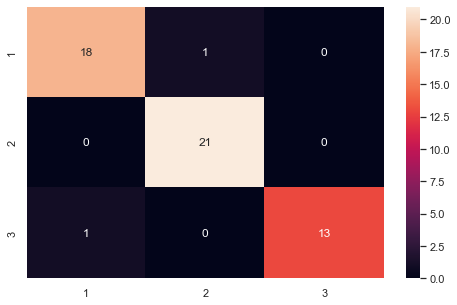

In [72]:
import seaborn as sns
confusion_matrix_dtc = pd.DataFrame(confusion_matrix_dtc,
    columns=["1", "2", "3"],
    index=["1", "2", "3"]
)

sns.heatmap(confusion_matrix_dtc, annot=True)

Es mantenen els errors variant l'error en la predicció de la classe 3 en què amb Standarscaler ho classificava com a 1 i en aquest cas com a 2

In [73]:
print(dtc.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Faig un print dels paràmetres que s'han utilitzat per entrenar el model

MODEL K-nearest Neighbors (KNN)

In [74]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

classifier=classifier.fit(X_train, y_train)

y_pred_knn = classifier.predict(X_test)

In [75]:
print(classifier.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [76]:
from sklearn.metrics import confusion_matrix

Dubte: Si no torno a imporar confusion_matrix em dóna error, perquè?

In [77]:
confusion_matrix_knn=confusion_matrix(y_true, y_pred_knn)

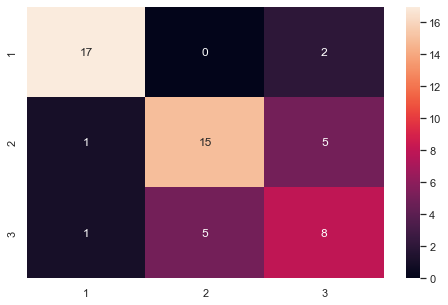

In [78]:
import seaborn as sns
confusion_matrix_knn = pd.DataFrame(confusion_matrix_knn,
    columns=["1", "2", "3"],
    index=["1", "2", "3"]
)

sns.heatmap(confusion_matrix_knn, annot=True)

Té els mateixos erros que sense procés d'enginyeria i molt lluny dels 2 errors aconseguits amb Standarscaler

In [79]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Calcular la precisió per a cada model
acc_dtc = accuracy_score(y_test, y_pred_dtc)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ('acc_dtc:', acc_dtc)
print ('acc_knn:',acc_knn)

acc_dtc: 0.9629629629629629
acc_knn: 0.7407407407407407


In [80]:
# Calcular la sensibilitat per a cada model (micro)
rec_dtc_micro = recall_score(y_test, y_pred_dtc, average='micro')
rec_knn_micro = recall_score(y_test, y_pred_knn, average='micro')
print ('rec_dtc_micro:', rec_dtc_micro)
print ('rec_knn_micro:',rec_knn_micro)

rec_dtc_micro: 0.9629629629629629
rec_knn_micro: 0.7407407407407407


In [81]:
# Calcular la sensibilitat per a cada model (macro)
rec_dtc_macro = recall_score(y_test, y_pred_dtc, average='macro')
rec_knn_macro = recall_score(y_test, y_pred_knn, average='macro')
print ('rec_dtc_macro:', rec_dtc_macro)
print ('rec_knn_macro:', rec_knn_macro)

rec_dtc_macro: 0.9586466165413533
rec_knn_macro: 0.7268170426065163


In [82]:
#Calcular l'indicador F1 per a cada model (micro)
f1_dtc_micro = f1_score(y_test, y_pred_dtc,average='micro')
f1_knn_micro = f1_score(y_test, y_pred_knn, average='micro')
print ('f1_dtc_micro:', f1_dtc_micro)
print ('f1_knn_micro:',f1_knn_micro)

f1_dtc_micro: 0.9629629629629629
f1_knn_micro: 0.7407407407407407


Dubte: perquè em dóna el mateix resultat accuracy, recall score micro i f1 micro ?

In [83]:
#Calcular l'indicador F1 per a cada model (macro)
f1_dtc_macro = f1_score(y_test, y_pred_dtc,average='macro')
f1_knn_macro = f1_score(y_test, y_pred_knn, average='macro')
print ('f1_dtc_macro:', f1_dtc_macro)
print ('f1_knn_macro:', f1_knn_macro)

f1_dtc_macro: 0.9623585233540354
f1_knn_macro: 0.7260560990364894


In [84]:
df_compar= pd.DataFrame()
df_compar ['Mètodes']= 'Accuracy','Sensibilitat (Macro)','F1(Macro)'
df_compar['DecisionTreeClassifier']= acc_dtc, rec_dtc_macro, f1_dtc_macro
df_compar['KNN']= acc_knn, rec_knn_macro, f1_knn_macro
df_compar

,Mètodes,DecisionTreeClassifier,KNN
0,Accuracy,0.962963,0.740741
1,Sensibilitat (Macro),0.958647,0.726817
2,F1(Macro),0.962359,0.726056


No hi ha pràcticament diferència amb preprocessat que sense

In [85]:
acc_dtc_pp=acc_dtc
rec_dtc_macro_pp=rec_dtc_macro
f1_dtc_macro_pp=f1_dtc_macro
acc_knn_pp=acc_knn
rec_knn_macro_pp=rec_knn_macro
f1_knn_macro_pp=f1_knn_macro

# GridSearch

Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

DecisionTreeClassifier

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [5,6,7,8,9,10,11,12,15],
              'min_samples_split': [3,4,5,6,7,8,10,13,14,15,16,17,18],
              'criterion': ['gini', 'entropy'],
             'min_samples_leaf':[3,4,5,6,7,],
             'max_features':[1,3,4,5,6,7,9,11,13],
             'random_state':[42]}
dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(dtc, parameters, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_
best_params

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'random_state': 42}

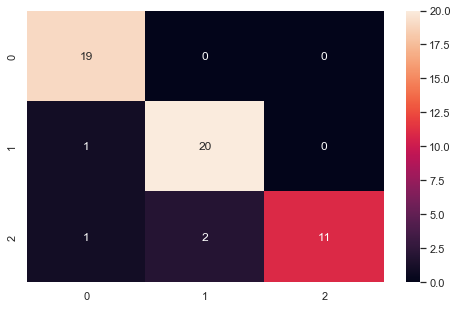

In [87]:
dtc = DecisionTreeClassifier(criterion='gini',
                                max_depth= 5, 
                                max_features=3,
                                  min_samples_leaf=4,
                                min_samples_split=3,
                               random_state=42)

dtc= dtc.fit(X_train,y_train)

y_pred_dtc = dtc.predict(X_test)
y_true=y_test
confusion_matrix_dtc=confusion_matrix(y_true, y_pred_dtc)
confusion_matrix_dtc_gs = pd.DataFrame(confusion_matrix_dtc,
    columns=["1", "2", "3"],
    index=["1", "2", "3"]
)

sns.heatmap(confusion_matrix_dtc, annot=True)

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7], 
              'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 3, 5], 
              'max_features': [None, 'sqrt', 'log2'],
             'random_state':[42]}
dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(dtc, parameters, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_
best_params

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 42}

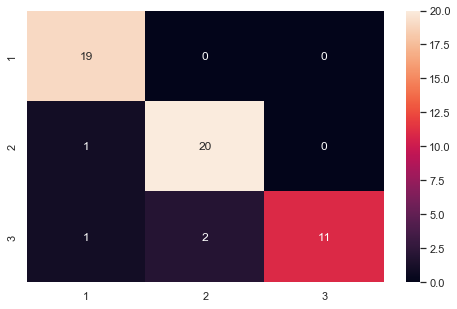

In [89]:
dtc = DecisionTreeClassifier(criterion='entropy',
                                max_depth= 3, 
                                  min_samples_leaf=3,
                                min_samples_split=2,
                              random_state=42)

dtc = dtc.fit(X_train,y_train)

y_pred_dtc = dtc.predict(X_test)
y_true=y_test
confusion_matrix_dtc=confusion_matrix(y_true, y_pred_dtc)
confusion_matrix_dtc = pd.DataFrame(confusion_matrix_dtc,
    columns=["1", "2", "3"],
    index=["1", "2", "3"]
)

sns.heatmap(confusion_matrix_dtc_gs, annot=True)

Els resultats han empitjorat envers els realitzats sense GridSearch

MODEL KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 
              'algorithm': ['ball_tree', 'kd_tree'], 'leaf_size': [20, 30]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_
best_params

{'algorithm': 'ball_tree',
 'leaf_size': 20,
 'n_neighbors': 3,
 'weights': 'distance'}

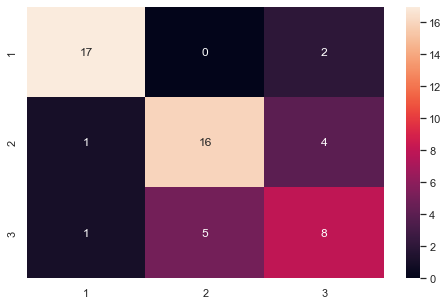

In [91]:
knn = KNeighborsClassifier (algorithm='ball_tree',
                               leaf_size=20,
                                n_neighbors=5,
                                weights= 'distance',
                             
                               )

knn = knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)
y_true=y_test
confusion_matrix_knn=confusion_matrix(y_true, y_pred_knn)
confusion_matrix_knn = pd.DataFrame(confusion_matrix_knn,
    columns=["1", "2", "3"],
    index=["1", "2", "3"]
)

sns.heatmap(confusion_matrix_knn, annot=True)

Es mantenen els resultats aconseguits sense el GridSearch

In [92]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Calcular la precisió per a cada model
acc_dtc = accuracy_score(y_test, y_pred_dtc)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ('acc_dtc:', acc_dtc)
print ('acc_knn:',acc_knn)

acc_dtc: 0.8518518518518519
acc_knn: 0.7592592592592593


In [93]:
# Calcular la sensibilitat per a cada model (micro)
rec_dtc_micro = recall_score(y_test, y_pred_dtc, average='micro')
rec_knn_micro = recall_score(y_test, y_pred_knn, average='micro')
print ('rec_dtc_micro:', rec_dtc_micro)
print ('rec_knn_micro:',rec_knn_micro)

rec_dtc_micro: 0.8518518518518519
rec_knn_micro: 0.7592592592592593


In [94]:
# Calcular la sensibilitat per a cada model (macro)
rec_dtc_macro = recall_score(y_test, y_pred_dtc, average='macro')
rec_knn_macro = recall_score(y_test, y_pred_knn, average='macro')
print ('rec_dtc_macro:', rec_dtc_macro)
print ('rec_knn_macro:', rec_knn_macro)

rec_dtc_macro: 0.8458646616541353
rec_knn_macro: 0.7426900584795323


In [95]:
#Calcular l'indicador F1 per a cada model (micro)
f1_dtc_micro = f1_score(y_test, y_pred_dtc,average='micro')
f1_knn_micro = f1_score(y_test, y_pred_knn, average='micro')
print ('f1_dtc_micro:', f1_dtc_micro)
print ('f1_knn_micro:',f1_knn_micro)

f1_dtc_micro: 0.8518518518518519
f1_knn_micro: 0.7592592592592593


Dubte: perquè em dóna el mateix resultat accuracy, recall score micro i f1 micro ?

In [96]:
#Calcular l'indicador F1 per a cada model (macro)
f1_dtc_macro = f1_score(y_test, y_pred_dtc,average='macro')
f1_knn_macro = f1_score(y_test, y_pred_knn, average='macro')
print ('f1_dtc_macro:', f1_dtc_macro)
print ('f1_knn_macro:', f1_knn_macro)

f1_dtc_macro: 0.8510989010989012
f1_knn_macro: 0.7426900584795323


In [97]:
df_compar= pd.DataFrame()
df_compar ['Mètodes']= 'Accuracy','Sensibilitat (Macro)','F1(Macro)'
df_compar['DecisionTreeClassifier']= acc_dtc, rec_dtc_macro, f1_dtc_macro
df_compar['KNN']= acc_knn, rec_knn_macro, f1_knn_macro
df_compar

,Mètodes,DecisionTreeClassifier,KNN
0,Accuracy,0.851852,0.759259
1,Sensibilitat (Macro),0.845865,0.742690
2,F1(Macro),0.851099,0.742690


In [98]:
acc_dtc_pp_gs=acc_dtc
rec_dtc_macro_pp_gs=rec_dtc_macro
f1_dtc_macro_pp_gs=f1_dtc_macro
acc_knn_pp_gs=acc_knn
rec_knn_macro_pp_gs=rec_knn_macro
f1_knn_macro_pp_gs=f1_knn_macro

In [114]:
df_compar= pd.DataFrame()
df_compar ['Mètodes']= 'Accuracy','Sensibilitat (Macro)','F1(Macro)'

df_compar['DecisionTreeClassifier sense tractar']= acc_dtc_st, rec_dtc_macro_st, f1_dtc_macro_st
df_compar['KNN sense tractar']= acc_knn_st, rec_knn_macro_st, f1_knn_macro_st

df_compar['DecisionTreeClassifier amb GridSearch']= acc_dtc_gd, rec_dtc_macro_gd, f1_dtc_macro_gd
df_compar['KNN amb GridSearch']= acc_knn_gd, rec_knn_macro_gd, f1_knn_macro_gd

df_compar['DecisionTreeClassifier amb Standarscaler']= acc_dtc_sds, rec_dtc_macro_sds, f1_dtc_macro_sds
df_compar['KNN amb Standarscaler']= acc_knn_sds, rec_knn_macro_sds, f1_knn_macro_sds

df_compar['DecisionTreeClassifier amb Standarscaler i GridSearch']= acc_dtc_sds_gs, rec_dtc_macro_sds_gs, f1_dtc_macro_sds_gs
df_compar['KNN amb Standarscaler i GridSearch']= acc_knn_sds_gs, rec_knn_macro_sds_gs, f1_knn_macro_sds_gs

df_compar['DecisionTreeClassifier amb preprocessat']= acc_dtc_pp, rec_dtc_macro_pp, f1_dtc_macro_pp
df_compar['KNN amb Standarscaler amb preprocessat']= acc_knn_pp, rec_knn_macro_pp, f1_knn_macro_pp

df_compar['DecisionTreeClassifier amb preprocessat i GridSearch']= acc_dtc_pp_gs, rec_dtc_macro_pp_gs, f1_dtc_macro_pp_gs
df_compar['KNN amb Standarscaler amb preprocessat i GridSearch']= acc_knn_pp_gs, rec_knn_macro_pp_gs, f1_knn_macro_pp_gs

df_compar

,Mètodes,DecisionTreeClassifier sense tractar,KNN sense tractar,DecisionTreeClassifier amb GridSearch,KNN amb GridSearch,DecisionTreeClassifier amb Standarscaler,KNN amb Standarscaler,DecisionTreeClassifier amb Standarscaler i GridSearch,KNN amb Standarscaler i GridSearch,DecisionTreeClassifier amb preprocessat,KNN amb Standarscaler amb preprocessat,DecisionTreeClassifier amb preprocessat i GridSearch,KNN amb Standarscaler amb preprocessat i GridSearch
0,Accuracy,0.944444,0.740741,0.851852,0.759259,0.962963,0.962963,0.851852,0.962963,0.962963,0.740741,0.851852,0.759259
1,Sensibilitat (Macro),0.941103,0.726817,0.845865,0.742690,0.958647,0.968254,0.845865,0.968254,0.958647,0.726817,0.845865,0.742690
2,F1(Macro),0.945476,0.726056,0.851099,0.744183,0.962359,0.963292,0.851099,0.963292,0.962359,0.726056,0.851099,0.742690


In [115]:
df_compar= df_compar [['Mètodes','DecisionTreeClassifier sense tractar','DecisionTreeClassifier amb Standarscaler','KNN amb Standarscaler']]

In [116]:
df_compar = df_compar.set_index('Mètodes')


In [117]:
df_compar

,DecisionTreeClassifier sense tractar,DecisionTreeClassifier amb Standarscaler,KNN amb Standarscaler
Mètodes,,,
Accuracy,0.944444,0.962963,0.962963
Sensibilitat (Macro),0.941103,0.958647,0.968254
F1(Macro),0.945476,0.962359,0.963292


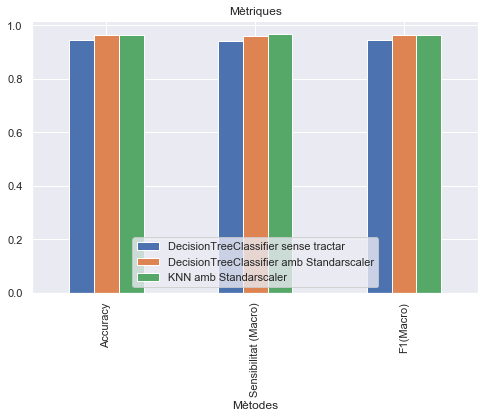

In [118]:
import matplotlib.pyplot as plt
df_compar.plot(kind='bar', title='Mètriques')
plt.show()


Com es pot veure el model que dóna millors mètriques és el KNN fent un Standarscaler. Per altra banda caldria conèixer quines són les necessites exactes que cal predir per tal de valorar mitjançant les matrius de confusió per a decidir quin model ens va millor